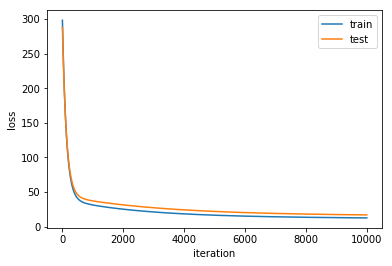

In [5]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot
train,target=load_svmlight_file('F:\housing_scale')#read data
x_train,x_test, y_train,y_test = train_test_split(train,target,test_size = 0.2,random_state = 0)#切分数据集

#compuet loss
def computeCost(X, y, theta):
    m = y.shape[0]
    J = (np.sum((X.dot(theta) - y)**2)) / (2*m) 
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    # loss
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        J_history[iter] = computeCost(X, y, theta)
        theta = theta - (alpha/m) * (X.T.dot(X.dot(theta) - y))
    return theta,J_history

m, n = np.shape(x_train)
theta= np.zeros((n,1))#init parameter
alpha = 0.001#learnrate
maxIteration = 10000#Iteration number
y_train=y_train.reshape(m,1)
m, n = np.shape(x_test)
y_test=y_test.reshape(m,1)
theta_train,loss_iteration_train = gradientDescent(x_train,y_train, theta, alpha, maxIteration)
theta_test,loss_iteration_test = gradientDescent(x_test,y_test, theta, alpha, maxIteration)
pyplot.plot(loss_iteration_train, mfc='w',label='train')
pyplot.plot(loss_iteration_test, mfc='w',label='test')
pyplot.legend()
pyplot.xlabel("iteration")
pyplot.ylabel("loss")
pyplot.show()